In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
# Load the MNIST dataset (images and labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [21]:
# Preprocess the data - Reshape the data to fit the CNN input grayscale images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [22]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
# Build the CNN model - Sequential: Model where layers are stacked in order.
model = models.Sequential()

In [24]:
# First Convolutional Layer
# Conv2D: 32 filters of size 3×3, ReLU activation.
# MaxPooling2D: Reduces spatial size (downsampling).
# It works by sliding a window (in this case 2×2) over the input and selecting the maximum value in each window.

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\Abrarali\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [26]:
# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [27]:
# Flatten the results from the convolutional layers:
# What it does:
#Converts a multi-dimensional tensor (from the convolutional layers) into a 1D vector.
#This is required because the dense (fully connected) layers expect input in vector form (not 2D images).
model.add(layers.Flatten())

In [28]:
model.add(layers.Dense(64, activation='relu'))

In [29]:
model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 5s - 14ms/step - accuracy: 0.1042 - loss: 2.2975
Test accuracy: 10.42%


In [32]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


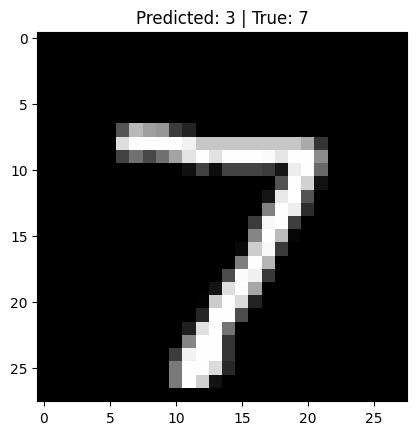

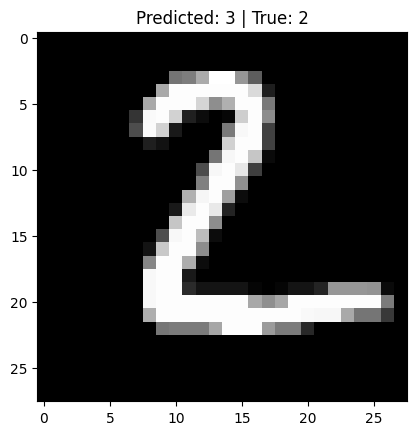

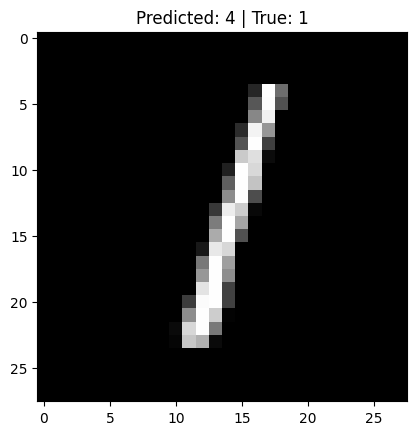

In [34]:
for i in range(3):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {y_test[i]}")
    plt.show()